In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json
from basenji import seqnn

from utils.evaluate_basset_performance import *

In [3]:
params_dir = "/clusterfs/nilah/pooja/kidney_data/models"

In [19]:
%%bash

script_dir="/clusterfs/nilah/pooja/batch_scripts/train"

for model in 2x_params_more_layers 2x_params_same_layers 4x_params_same_layers 8x_params_same_layers;
do
    cp ${script_dir}/train_multi_gpu_template.sh ${script_dir}/train_kidney_data_multitask_${model}.sh
    echo "python /global/home/users/poojakathail/basenji/bin/basenji_train.py -k -o /clusterfs/nilah/pooja/kidney_data/train/replicate_models/train__multitask_${model}__all_sequences__1/done.txt --float-type float16 /clusterfs/nilah/pooja/kidney_data/models/params_sc_kidney_regression_multitask_${model}.json /clusterfs/nilah/pooja/kidney_data/kidney_sc_data_processed_bigwigs_holdout_chrs" >> ${script_dir}/train_kidney_data_multitask_${model}.sh
    sbatch ${script_dir}/train_kidney_data_multitask_${model}.sh
done

Submitted batch job 16763239


In [20]:
%%bash

script_dir="/clusterfs/nilah/pooja/batch_scripts/train"

for model in 2x_params_more_layers 2x_params_same_layers 4x_params_same_layers 8x_params_same_layers;

do
    cp ${script_dir}/train_multi_gpu_template.sh ${script_dir}/train_immune_atlas_multitask_${model}.sh
    echo "python /global/home/users/poojakathail/basenji/bin/basenji_train.py -k -o /clusterfs/nilah/pooja/immune_atlas/train/replicate_models/train__multitask_${model}__all_sequences__1/done.txt --float-type float32 /clusterfs/nilah/pooja/immune_atlas/models/params_sc_kidney_regression_multitask_${model}.json /clusterfs/nilah/pooja/immune_atlas/all_sequences_processed_float32" >> ${script_dir}/train_immune_atlas_multitask_${model}.sh
    sbatch ${script_dir}/train_immune_atlas_multitask_${model}.sh
done

Submitted batch job 16763245


In [2]:
%%bash

script_dir="/clusterfs/nilah/pooja/batch_scripts/train"

model="8x_params_same_layers"
for rep in 2 3;
do
    cp ${script_dir}/train_multi_gpu_template.sh ${script_dir}/train_kidney_data_multitask_${model}_${rep}.sh
    echo "python /global/home/users/poojakathail/basenji/bin/basenji_train.py -k -o /clusterfs/nilah/pooja/kidney_data/train/replicate_models/train__multitask_${model}__all_sequences__${rep}/done.txt --float-type float16 /clusterfs/nilah/pooja/kidney_data/models/params_sc_kidney_regression_multitask_${model}.json /clusterfs/nilah/pooja/kidney_data/kidney_sc_data_processed_bigwigs_holdout_chrs" >> ${script_dir}/train_kidney_data_multitask_${model}_${rep}.sh
    sbatch ${script_dir}/train_kidney_data_multitask_${model}_${rep}.sh
done

Submitted batch job 17496834
Submitted batch job 17496835


In [1]:
%%bash

script_dir="/clusterfs/nilah/pooja/batch_scripts/train"

model="8x_params_same_layers"
for rep in 2 3;
do
    cp ${script_dir}/train_multi_gpu_template.sh ${script_dir}/train_immune_atlas_multitask_${model}_${rep}.sh
    echo "python /global/home/users/poojakathail/basenji/bin/basenji_train.py -k -o /clusterfs/nilah/pooja/immune_atlas/train/replicate_models/train__multitask_${model}__all_sequences__${rep}/done.txt --float-type float32 /clusterfs/nilah/pooja/immune_atlas/models/params_sc_kidney_regression_multitask_${model}.json /clusterfs/nilah/pooja/immune_atlas/all_sequences_processed_float32" >> ${script_dir}/train_immune_atlas_multitask_${model}_${rep}.sh
    sbatch ${script_dir}/train_immune_atlas_multitask_${model}_${rep}.sh
done

Submitted batch job 17496832
Submitted batch job 17496833


In [3]:
%%bash

script_dir="/clusterfs/nilah/pooja/batch_scripts/train"

cluster_dir="/clusterfs/nilah/pooja/kidney_data/CellTypeSpecificPeakClusters_ArchR_clust11"
cluster_list="all_sequences,cluster1_CD,cluster2_Immune,cluster3_Ubiquitous,cluster4_DistalNephron,cluster6_PanTubule,cluster7_Tcell,cluster8_PanNonEpithelial,cluster9_Stroma,cluster10_Endothelial,cluster11_PT,cluster12_podocyte"
genome="hg38"
targets="/clusterfs/nilah/pooja/kidney_data/targets.txt"

for model in 2x_params_more_layers 2x_params_same_layers 4x_params_same_layers 8x_params_same_layers;
do
    model_params="/clusterfs/nilah/pooja/kidney_data/models/params_sc_kidney_regression_multitask_${model}.json"
    model_dir="/clusterfs/nilah/pooja/kidney_data/train/replicate_models/train__multitask_${model}__all_sequences__1"

    cp ${script_dir}/train_immune_atlas_single_task_template.sh ${script_dir}/test_kidney_data_multitask_${model}.sh
    echo "/global/home/users/poojakathail/basenji/bin/basenji_predict_cluster_beds.sh $cluster_dir $cluster_list $genome $targets $model_params ${model_dir}/done.txt ${model_dir}/predict_beds/done_predict_beds.txt" >> ${script_dir}/test_kidney_data_multitask_${model}.sh
    echo "python /global/home/users/poojakathail/basenji/bin/basenji_reference_accuracy_by_cluster.py -t $targets ${model_dir}/predict_beds/reference_accuracy_by_cluster.tsv ${cluster_dir}/model_predictions" >> ${script_dir}/test_kidney_data_multitask_${model}.sh

    sbatch ${script_dir}/test_kidney_data_multitask_${model}.sh
done


Submitted batch job 16771309


In [4]:
%%bash

script_dir="/clusterfs/nilah/pooja/batch_scripts/train"

cluster_dir="/clusterfs/nilah/pooja/kidney_data/CellTypeSpecificPeakClusters_ArchR_clust11"
cluster_list="all_sequences,cluster1_CD,cluster2_Immune,cluster3_Ubiquitous,cluster4_DistalNephron,cluster6_PanTubule,cluster7_Tcell,cluster8_PanNonEpithelial,cluster9_Stroma,cluster10_Endothelial,cluster11_PT,cluster12_podocyte"
genome="hg38"
targets="/clusterfs/nilah/pooja/kidney_data/targets.txt"
model="8x_params_same_layers"

for rep in 2 3;
do
    model_params="/clusterfs/nilah/pooja/kidney_data/models/params_sc_kidney_regression_multitask_${model}.json"
    model_dir="/clusterfs/nilah/pooja/kidney_data/train/replicate_models/train__multitask_${model}__all_sequences__${rep}"

    cp ${script_dir}/train_immune_atlas_single_task_template.sh ${script_dir}/test_kidney_data_multitask_${model}_${rep}.sh
    echo "/global/home/users/poojakathail/basenji/bin/basenji_predict_cluster_beds.sh $cluster_dir $cluster_list $genome $targets $model_params ${model_dir}/done.txt ${model_dir}/predict_beds/done_predict_beds.txt" >> ${script_dir}/test_kidney_data_multitask_${model}_${rep}.sh
    echo "python /global/home/users/poojakathail/basenji/bin/basenji_reference_accuracy_by_cluster.py -t $targets ${model_dir}/predict_beds/reference_accuracy_by_cluster.tsv ${cluster_dir}/model_predictions" >> ${script_dir}/test_kidney_data_multitask_${model}_${rep}.sh

    sbatch ${script_dir}/test_kidney_data_multitask_${model}_${rep}.sh
done


Submitted batch job 17514640
Submitted batch job 17514641


In [4]:
%%bash

script_dir="/clusterfs/nilah/pooja/batch_scripts/train"

cluster_dir="/clusterfs/nilah/pooja/immune_atlas/CellTypeSpecificPeakClusters"
cluster_list="all_sequences,cluster_B_resting,cluster_EPI_resting,cluster_T_resting,cluster_myeloid_resting,cluster_nk_resting,cluster_open,cluster_progenitor_resting,cluster_thymo_resting"
genome="hg19"
targets="/clusterfs/nilah/pooja/immune_atlas/targets.txt"

for model in 2x_params_more_layers 2x_params_same_layers 4x_params_same_layers 8x_params_same_layers;
do
    model_params="/clusterfs/nilah/pooja/immune_atlas/models/params_sc_kidney_regression_multitask_${model}.json"
    model_dir="/clusterfs/nilah/pooja/immune_atlas/train/replicate_models/train__multitask_${model}__all_sequences__1"

    cp ${script_dir}/train_immune_atlas_single_task_template.sh ${script_dir}/test_immune_atlas_multitask_${model}.sh
    echo "/global/home/users/poojakathail/basenji/bin/basenji_predict_cluster_beds.sh $cluster_dir $cluster_list $genome $targets $model_params ${model_dir}/done.txt ${model_dir}/predict_beds/done_predict_beds.txt" >> ${script_dir}/test_immune_atlas_multitask_${model}.sh
    echo "python /global/home/users/poojakathail/basenji/bin/basenji_reference_accuracy_by_cluster.py -t $targets ${model_dir}/predict_beds/reference_accuracy_by_cluster.tsv ${cluster_dir}/model_predictions" >> ${script_dir}/test_immune_atlas_multitask_${model}.sh

    sbatch ${script_dir}/test_immune_atlas_multitask_${model}.sh
done


Submitted batch job 16771310


In [3]:
%%bash

script_dir="/clusterfs/nilah/pooja/batch_scripts/train"

cluster_dir="/clusterfs/nilah/pooja/immune_atlas/CellTypeSpecificPeakClusters"
cluster_list="all_sequences,cluster_B_resting,cluster_EPI_resting,cluster_T_resting,cluster_myeloid_resting,cluster_nk_resting,cluster_open,cluster_progenitor_resting,cluster_thymo_resting"
genome="hg19"
targets="/clusterfs/nilah/pooja/immune_atlas/targets.txt"
model="8x_params_same_layers"
for rep in 2 3;
do
    model_params="/clusterfs/nilah/pooja/immune_atlas/models/params_sc_kidney_regression_multitask_${model}.json"
    model_dir="/clusterfs/nilah/pooja/immune_atlas/train/replicate_models/train__multitask_${model}__all_sequences__${rep}"

    cp ${script_dir}/train_immune_atlas_single_task_template.sh ${script_dir}/test_immune_atlas_multitask_${model}_${rep}.sh
    echo "/global/home/users/poojakathail/basenji/bin/basenji_predict_cluster_beds.sh $cluster_dir $cluster_list $genome $targets $model_params ${model_dir}/done.txt ${model_dir}/predict_beds/done_predict_beds.txt" >> ${script_dir}/test_immune_atlas_multitask_${model}_${rep}.sh
    echo "python /global/home/users/poojakathail/basenji/bin/basenji_reference_accuracy_by_cluster.py -t $targets ${model_dir}/predict_beds/reference_accuracy_by_cluster.tsv ${cluster_dir}/model_predictions" >> ${script_dir}/test_immune_atlas_multitask_${model}_${rep}.sh

    sbatch ${script_dir}/test_immune_atlas_multitask_${model}_${rep}.sh
done


Submitted batch job 17514320
Submitted batch job 17514321


In [1]:
%%bash

script_dir="/clusterfs/nilah/pooja/batch_scripts/train"

imbalance_dir="/clusterfs/nilah/pooja/kidney_data/allelic_imbalance/raw/astestq10tab/cluster_imbalance_sets"
genome="hg38"
targets="/clusterfs/nilah/pooja/kidney_data/targets.txt"

for model in 2x_params_more_layers 2x_params_same_layers 4x_params_same_layers 8x_params_same_layers;
do
    model_params="/clusterfs/nilah/pooja/kidney_data/models/params_sc_kidney_regression_multitask_${model}.json"
    model_dir="/clusterfs/nilah/pooja/kidney_data/train/replicate_models/train__multitask_${model}__all_sequences__1"

    cp ${script_dir}/train_immune_atlas_single_task_template.sh ${script_dir}/test_kidney_data_multitask_${model}.sh
    echo "/global/home/users/poojakathail/basenji/bin/basenji_predict_allelic_imbalance.sh $imbalance_dir $genome $targets $model_params ${model_dir}/done.txt ${model_dir}/allelic_imbalance/done_allelic_imbalance.txt" >> ${script_dir}/test_kidney_data_multitask_${model}.sh
    echo "python /global/home/users/poojakathail/basenji/bin/basenji_allelic_imbalance_by_cluster.py -t $targets -i ${imbalance_dir} ${model_dir}/allelic_imbalance/allelic_imbalance_by_cluster.xlsx" >> ${script_dir}/test_kidney_data_multitask_${model}.sh

    sbatch ${script_dir}/test_kidney_data_multitask_${model}.sh
done

Submitted batch job 17390454
Submitted batch job 17390455
Submitted batch job 17390456
Submitted batch job 17390457


In [1]:
%%bash

script_dir="/clusterfs/nilah/pooja/batch_scripts/train"

imbalance_dir="/clusterfs/nilah/pooja/kidney_data/allelic_imbalance/raw/astestq10tab/cluster_imbalance_sets"
genome="hg38"
targets="/clusterfs/nilah/pooja/kidney_data/targets.txt"
model="8x_params_same_layers"
for rep in 2 3;
do
    model_params="/clusterfs/nilah/pooja/kidney_data/models/params_sc_kidney_regression_multitask_${model}.json"
    model_dir="/clusterfs/nilah/pooja/kidney_data/train/replicate_models/train__multitask_${model}__all_sequences__${rep}"

    cp ${script_dir}/train_immune_atlas_single_task_template.sh ${script_dir}/test_kidney_data_multitask_${model}_${rep}.sh
    echo "/global/home/users/poojakathail/basenji/bin/basenji_predict_allelic_imbalance.sh $imbalance_dir $genome $targets $model_params ${model_dir}/done.txt ${model_dir}/allelic_imbalance/done_allelic_imbalance.txt" >> ${script_dir}/test_kidney_data_multitask_${model}_${rep}.sh
    echo "python /global/home/users/poojakathail/basenji/bin/basenji_allelic_imbalance_by_cluster.py -t $targets -i ${imbalance_dir} ${model_dir}/allelic_imbalance/allelic_imbalance_by_cluster.xlsx" >> ${script_dir}/test_kidney_data_multitask_${model}_${rep}.sh

    sbatch ${script_dir}/test_kidney_data_multitask_${model}_${rep}.sh
done

Submitted batch job 17513798
Submitted batch job 17513799


In [2]:
%%bash

script_dir="/clusterfs/nilah/pooja/batch_scripts/train"

imbalance_dir="/clusterfs/nilah/pooja/immune_atlas/allelic_imbalance/data/cluster_imbalance_sets"
genome="hg19"
targets="/clusterfs/nilah/pooja/immune_atlas/targets.txt"

for model in 2x_params_more_layers 2x_params_same_layers 4x_params_same_layers 8x_params_same_layers;
do
    model_params="/clusterfs/nilah/pooja/immune_atlas/models/params_sc_kidney_regression_multitask_${model}.json"
    model_dir="/clusterfs/nilah/pooja/immune_atlas/train/replicate_models/train__multitask_${model}__all_sequences__1"

    cp ${script_dir}/train_immune_atlas_single_task_template.sh ${script_dir}/test_immune_atlas_multitask_${model}.sh
    echo "/global/home/users/poojakathail/basenji/bin/basenji_predict_allelic_imbalance.sh $imbalance_dir $genome $targets $model_params ${model_dir}/done.txt ${model_dir}/allelic_imbalance/done_allelic_imbalance.txt" >> ${script_dir}/test_immune_atlas_multitask_${model}.sh
    echo "python /global/home/users/poojakathail/basenji/bin/basenji_allelic_imbalance_by_cluster.py -t $targets -i ${imbalance_dir} ${model_dir}/allelic_imbalance/allelic_imbalance_by_cluster.xlsx" >> ${script_dir}/test_immune_atlas_multitask_${model}.sh

    sbatch ${script_dir}/test_immune_atlas_multitask_${model}.sh
done

Submitted batch job 17390458
Submitted batch job 17390459
Submitted batch job 17390460
Submitted batch job 17390461


In [2]:
%%bash

script_dir="/clusterfs/nilah/pooja/batch_scripts/train"

imbalance_dir="/clusterfs/nilah/pooja/immune_atlas/allelic_imbalance/data/cluster_imbalance_sets"
genome="hg19"
targets="/clusterfs/nilah/pooja/immune_atlas/targets.txt"
model="8x_params_same_layers"

for rep in 2 3;
do
    model_params="/clusterfs/nilah/pooja/immune_atlas/models/params_sc_kidney_regression_multitask_${model}.json"
    model_dir="/clusterfs/nilah/pooja/immune_atlas/train/replicate_models/train__multitask_${model}__all_sequences__${rep}"

    cp ${script_dir}/train_immune_atlas_single_task_template.sh ${script_dir}/test_immune_atlas_multitask_${model}_${rep}.sh
    echo "/global/home/users/poojakathail/basenji/bin/basenji_predict_allelic_imbalance.sh $imbalance_dir $genome $targets $model_params ${model_dir}/done.txt ${model_dir}/allelic_imbalance/done_allelic_imbalance.txt" >> ${script_dir}/test_immune_atlas_multitask_${model}_${rep}.sh
    echo "python /global/home/users/poojakathail/basenji/bin/basenji_allelic_imbalance_by_cluster.py -t $targets -i ${imbalance_dir} ${model_dir}/allelic_imbalance/allelic_imbalance_by_cluster.xlsx" >> ${script_dir}/test_immune_atlas_multitask_${model}_${rep}.sh

    sbatch ${script_dir}/test_immune_atlas_multitask_${model}_${rep}.sh
done

Submitted batch job 17513800
Submitted batch job 17513801


### Results

Loeb et al.

In [4]:
data_dir = "/clusterfs/nilah/pooja/kidney_data"
fig_dir = "/clusterfs/nilah/pooja/CellTypeSpecificAccessibilityPrediction/figures"

targets = pd.read_csv(f"{data_dir}/targets.txt", sep="\t", header=0, index_col=0)
cell_types = targets["identifier"].values

cell_type_peak_set_mapping = {"PT": ["cluster11_PT", "cluster3_Ubiquitous", "all_sequences"],
                              "DT": ["cluster4_DistalNephron", "cluster3_Ubiquitous", "all_sequences"],
                              "LOH": ["cluster4_DistalNephron", "cluster3_Ubiquitous", "all_sequences"],
                              "Str": ["cluster9_Stroma", "cluster3_Ubiquitous", "all_sequences"],}


tasks = ["single_task", "multitask", "multitask_2x_params_more_layers", 
         "multitask_2x_params_same_layers", "multitask_4x_params_same_layers",  "multitask_8x_params_same_layers"]
training_sets = ["all_sequences"]

In [5]:
# reference accuracy
ref_acc_by_cluster_replicates = read_reference_accuracy_replicates(data_dir, cell_type_peak_set_mapping.keys(), 
                                                                   tasks, training_sets)
formatted_df = format_df_to_plot(ref_acc_by_cluster_replicates, cell_type_peak_set_mapping,
                                 tasks, training_sets)
formatted_df.loc[~formatted_df["Cluster"].isin(['cluster3_Ubiquitous', 'all_sequences']), 
                 "Cluster"] = "Cell-type specific"

formatted_df["Number of parameters"] = np.nan
for training_task in formatted_df["Training Task"].unique():  
    if training_task == "multitask":
        formatted_df.loc[formatted_df["Training Task"] == training_task, "Number of parameters"] = 5_842_034
    elif "2x_params_same_layers" in training_task:
        formatted_df.loc[formatted_df["Training Task"] == training_task, "Number of parameters"] = 11_748_288
    elif "4x_params_same_layers" in training_task:
        formatted_df.loc[formatted_df["Training Task"] == training_task, "Number of parameters"] = 23_418_668
    elif "8x_params_same_layers" in training_task:
        formatted_df.loc[formatted_df["Training Task"] == training_task, "Number of parameters"] = 48_406_668

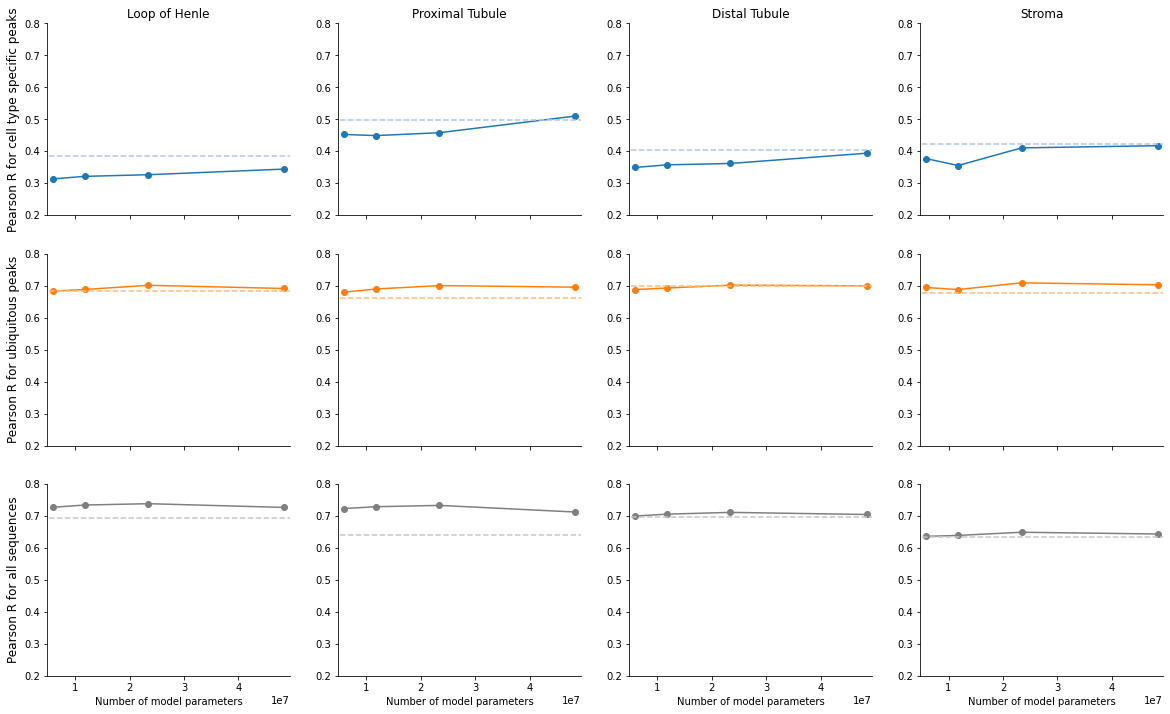

In [53]:
cmap = plt.get_cmap("tab20")
cluster_labels = ["cell type specific peaks", "ubiquitous peaks", "all sequences"]
cell_types = ["Loop of Henle", "Proximal Tubule", "Distal Tubule", "Stroma"]
colors = [[cmap(0), cmap(1)], [cmap(2), cmap(3)], [cmap(14), cmap(15)]]

fig, ax = plt.subplots(3, 4, figsize=(20, 12))
for i, cluster in enumerate(["Cell-type specific",  "cluster3_Ubiquitous", "all_sequences"]):
    
    for j, cell_type in enumerate(["LOH", "PT", "DT", "Str"]):
        
        tmp_df = formatted_df[(formatted_df["Training Data"] == "all_sequences") &
                 (formatted_df["Cluster"] == cluster) & 
                 (~formatted_df["Number of parameters"].isna()) &
                 (formatted_df["Cell Type"] == cell_type)].groupby("Number of parameters").median()
        ax[i, j].plot(tmp_df.index.values, tmp_df["Pearson R"].values, 'o-', label=cell_type, color=colors[i][0])

    
        single_task_tmp_df = formatted_df[(formatted_df["Training Data"] == "all_sequences") &
                 (formatted_df["Cluster"] == cluster) & 
                 (formatted_df["Cell Type"] == cell_type) &
                 (formatted_df["Training Task"] == "single_task")]
    
        ax[i, j].hlines(np.median(single_task_tmp_df["Pearson R"]), xmin=ax[i, j].get_xlim()[0], xmax=ax[i, j].get_xlim()[1],
                    linestyle="--", color=colors[i][1])
        if j == 0:
            ax[i, j].set_ylabel(f"Pearson R for {cluster_labels[i]}" ,fontsize=12)
        if i == 0:
            ax[i,j].set_title(cell_types[j])
        if i == 2:
            ax[i,j].set_xlabel("Number of model parameters")
        else:
            ax[i,j].set_xticklabels([])
        
        ax[i,j].set_xlim(formatted_df["Number of parameters"].min() - 1e6, formatted_df["Number of parameters"].max()+1e6)
        ax[i,j].set_ylim(0.2, 0.8)
sns.despine()
plt.savefig(f"{fig_dir}/supp_figs/loeb_et_al_model_capacity.pdf", dpi=300)

Calderon et al.

In [63]:
data_dir = "/clusterfs/nilah/pooja/immune_atlas"
fig_dir = "/clusterfs/nilah/pooja/CellTypeSpecificAccessibilityPrediction/figures"

targets = pd.read_csv(f"{data_dir}/targets.txt", sep="\t", header=0, index_col=0)
cell_types = targets["identifier"].values

cell_type_peak_set_mapping = {"Bnaive": ["cluster_B_resting", "cluster_open", "all_sequences"],
                              "Bbulk": ["cluster_B_resting", "cluster_open", "all_sequences"],
                              "NKim": ["cluster_nk_resting", "cluster_open", "all_sequences"],
                              "NKma": ["cluster_nk_resting", "cluster_open", "all_sequences"],
                              "DCmye": ["cluster_myeloid_resting", "cluster_open", "all_sequences"],
                              "pDC": ["cluster_nk_resting", "cluster_open", "all_sequences"],
                              "TCD8": ["cluster_T_resting", "cluster_open", "all_sequences"],
                              "TCD8EM": ["cluster_T_resting", "cluster_open", "all_sequences"]}


tasks = ["single_task", "multitask", "multitask_2x_params_more_layers", 
         "multitask_2x_params_same_layers", "multitask_4x_params_same_layers", "multitask_8x_params_same_layers"]
training_sets = ["all_sequences"]

In [64]:
# reference accuracy
ref_acc_by_cluster_replicates = read_reference_accuracy_replicates(data_dir, cell_type_peak_set_mapping.keys(), 
                                                                   tasks, training_sets)
formatted_df = format_df_to_plot(ref_acc_by_cluster_replicates, cell_type_peak_set_mapping,
                                 tasks, training_sets)
formatted_df.loc[~formatted_df["Cluster"].isin(['cluster_open', 'all_sequences']), 
                 "Cluster"] = "Cell-type specific"

formatted_df["Number of parameters"] = np.nan
for training_task in formatted_df["Training Task"].unique():  
    if training_task == "multitask":
        formatted_df.loc[formatted_df["Training Task"] == training_task, "Number of parameters"] = 5_842_034
    elif "2x_params_same_layers" in training_task:
        formatted_df.loc[formatted_df["Training Task"] == training_task, "Number of parameters"] = 11_748_288
    elif "4x_params_same_layers" in training_task:
        formatted_df.loc[formatted_df["Training Task"] == training_task, "Number of parameters"] = 23_418_668
    elif "8x_params_same_layers" in training_task:
        formatted_df.loc[formatted_df["Training Task"] == training_task, "Number of parameters"] = 48_406_668

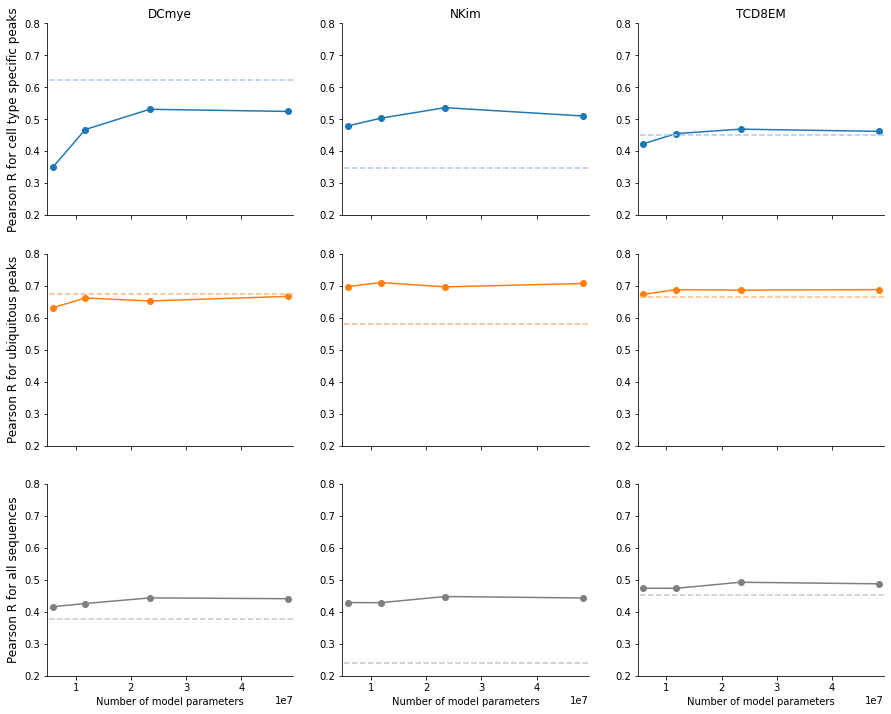

In [66]:
cmap = plt.get_cmap("tab20")
cluster_labels = ["cell type specific peaks", "ubiquitous peaks", "all sequences"]
cell_types = ["Loop of Henle", "Proximal Tubule", "Distal Tubule", "Stroma"]
colors = [[cmap(0), cmap(1)], [cmap(2), cmap(3)], [cmap(14), cmap(15)]]

fig, ax = plt.subplots(3, 3, figsize=(15, 12))
for i, cluster in enumerate(["Cell-type specific",  "cluster_open", "all_sequences"]):
    
    for j, cell_type in enumerate(["DCmye", "NKim", "TCD8EM"]):
        
        tmp_df = formatted_df[(formatted_df["Training Data"] == "all_sequences") &
                 (formatted_df["Cluster"] == cluster) & 
                 (~formatted_df["Number of parameters"].isna()) &
                 (formatted_df["Cell Type"] == cell_type)].groupby("Number of parameters").median()
        ax[i, j].plot(tmp_df.index.values, tmp_df["Pearson R"].values, 'o-', label=cell_type, color=colors[i][0])

    
        single_task_tmp_df = formatted_df[(formatted_df["Training Data"] == "all_sequences") &
                 (formatted_df["Cluster"] == cluster) & 
                 (formatted_df["Cell Type"] == cell_type) &
                 (formatted_df["Training Task"] == "single_task")]
    
        # plt.fill_between(plt.xlim(), np.median(single_task_tmp_df["Pearson R"]) - np.std(single_task_tmp_df["Pearson R"]), 
        #             np.median(single_task_tmp_df["Pearson R"]) + np.std(single_task_tmp_df["Pearson R"]),
        #             alpha=0.3)
        ax[i, j].hlines(np.median(single_task_tmp_df["Pearson R"]), xmin=ax[i, j].get_xlim()[0], xmax=ax[i, j].get_xlim()[1],
                    linestyle="--", color=colors[i][1])
        if j == 0:
            ax[i, j].set_ylabel(f"Pearson R for {cluster_labels[i]}" ,fontsize=12)
        if i == 0:
            ax[i,j].set_title(cell_type)
        if i == 2:
            ax[i,j].set_xlabel("Number of model parameters")
        else:
            ax[i,j].set_xticklabels([])
        
        ax[i,j].set_xlim(formatted_df["Number of parameters"].min() - 1e6, formatted_df["Number of parameters"].max()+1e6)
        ax[i,j].set_ylim(0.2, 0.8)
sns.despine()
plt.savefig(f"{fig_dir}/supp_figs/calderon_et_al_model_capacity.pdf", dpi=300)